# Desafio Módulo 3 - Bootcamp Alura Data Science Aplicada 2

## Evolução da COVID-19 no Estado do Espírito Santo

![](https://www.es.gov.br/Media/PortalES/_Profiles/49c92637/35750552/e08ebe350a0c4f89ab48016feb017862-0001.jpg?v=637608860709167783)

# Antonio Drago Caetano
https://www.linkedin.com/in/antoniodragoc/

https://github.com/dragoc1

# Introdução

A partir de março de 2020, quando a Organização Mundial de Saúde (OMS) declarou ao mundo que a COVID-19, doença que é causada pelo novo corona vírus (Sars-CoV-2), teve seus primeiros casos três meses antes na cidade de Wuhan, na China, tinha se tornado uma pandemia e desde então temos vivido um quadro sanitário que não era visto desde a gripe espanhola no ano de 1918.

Hoje, o mundo se encontra com mais de 180 milhões de casos com aproximadamente 4 milhões de mortes causadas pela doença. No Brasil, segundo a Johns Hopkins University, apresenta mais de 18 milhões de casos e 520 mil mortes, uma letalidade de 2,88%, números muitos ruins quando comparados com o restante do mundo.

## Entendendo o contexto

No início do Bootcamp de Data Science Aplicada, como projeto do primeiro módulo foi feita uma análise da COVID-19 no Brasil, separando os dados por regiões e também os estados com maiores números de casos e mortes.

link do projeto:   https://github.com/dragoc1/Bootcamp_Data_Science_Aplicada/blob/main/Modulo01/Projeto%20Modulo%2001/desafio_modulo01.ipynb.

Na época o número de casos e de mortes estava em uma crescente nunca vista, superando o pico anterior da doença que tinha sido no mês de Julho de 2020, onde a média móvel de mortes superou pela primeira vez 1000 mortes, na época, achavamos que não tinha como piorar, porém, infelizmente estavamos enganados, pois no ano de 2021 em nenhum momento a média móvel de mortes ficou abaixo de 1000 atingindo mais de 3500 mortes em meados de Abril de 2021.


# Objetivos e análises

Entender a evolução da pandemia no território nacional e também no Estado do Espírito Santo que mesmo sendo um estado pequeno e não tão relevante para o número total de casos pode ser tomado como exemplo de boa gestão do governo estadual no combate da doença. O Estado apresenta hoje o número de 520 mil casos de Covid-19 com 11.520 mortes causadas pela doença, uma letalidade de 2,22%, número menor que a média nacional.

Iremos analisar o comportamento da doença até aqui, número de casos, número de mortes e como a vacinação vem impactando nos números da doença

# Obtenção dos dados

Assim como no primeiro projeto do curso, os dados utilizados serão obtidos da plataforma [Brail.io](https://brasil.io/covid19) 



# Importação das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import seaborn as sns
import warnings
import datetime
from datetime import datetime, date

#ignorar os avisos do python
warnings.filterwarnings('ignore')
# Fomatação do Pandas
#pd.options.display.float_format='{:.2f}'.format

# Definindo as Funções 

In [3]:
def coluna_regiao(data):
    a = data['city_ibge_code'].astype(str).str[0]
    # Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
    dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Centro Oeste','5':'Sul'}
    regiao = a.replace(dict_regiao,regex=True)

    data.insert(value = regiao, column = 'Região', loc = 1)

In [4]:
def organiza_week(data):

    # Busca no dataframe os valores dos quatro primeiros caracteres e compara com o ano de 2020
    aux_2020 = data[data['epidemiological_week'].astype(str).str[:4]=='2020']

    # Para os casos de 2020, busca a semana epidemiologica, ou seja, valores dos ultimos dois caracteres da string.
    aux_2020['epidemiological_week'] = aux_2020['epidemiological_week'].astype(str).str[4:].astype('int64')

    # Buscando valores para o ano de 2021
    aux_2021 = data[data['epidemiological_week'].astype(str).str[:4]=='2021']
    aux_2021['epidemiological_week'] = aux_2021['epidemiological_week'].astype(str).str[4:].astype('int64')

    # Para as semanas de 2021 será adicionado 53, para que o gráfico seja mostrado a continuidade das semanas.
    aux_2021['epidemiological_week'] = aux_2021['epidemiological_week'] + 53

    aux_concat = aux_2020['epidemiological_week']
    aux_concat = aux_concat.append(aux_2021['epidemiological_week'])

    data = data.sort_values(by = 'epidemiological_week')
    data['epidemiological_week'] = aux_concat
    return data

In [5]:
def plot_semana(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['last_available_confirmed'], ascending=False)
    x = 'epidemiological_week'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['last_available_date'].max())
    x_label = 'Semana epidemiológica'
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    plt.vlines(
        x = 54, 
        ymin = 0, 
        ymax = data[y].max(),
        ls = '--', color ='black', alpha = 0.4)
    plt.text(53,data[y].max()/2,'2021',rotation=90, fontsize = 12,color ='black', alpha = 0.4)
    ax;

In [6]:
#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

def plot_dia(data,y,hue,titulo):
    # Parâmetros
    data = data.sort_values(by=['date'])
    x = 'date'
    y = y
    hue = hue
    title = titulo + ' (Covid-19) - Atualizado: {}'.format(df['date'].max())
    x_label = ''
    y_label = 'Casos confirmados'

    # criando gráfico
    ax = sns.lineplot(
        data=data,
        x=x,
        y=y,
        hue = hue,
        palette = "rocket",
        ci = None)

    # Plot
    ax.figure.set_size_inches((16, 9))
    ax.set_title(title, fontsize = 20)    
    ax.grid(color='grey', linestyle='-.', linewidth=0.5)
    
    # axis
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    ax.xaxis.set_minor_locator(YearLocator())
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b-%y'))
    
    # Legenda e label
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlabel(x_label, fontsize= 14)
    ax.set_ylabel(y_label, fontsize = 14)
    plt.xticks(rotation = 60)    
    ax;

# Importação dos dados

In [7]:
df = pd.read_csv("./dados/caso_full.csv.gz",compression='gzip',sep = ',', error_bad_lines= False,encoding= 'utf-8', engine = 'python')

#df = pd.read_csv(url,compression='gzip',sep = ',', error_bad_lines= False,encoding= 'utf-8', engine = 'python')

In [8]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


# Tratamento dos dados

In [9]:
df['state'].value_counts().shape[0]

27

In [10]:
coluna_regiao(df)

In [11]:
df.head()

,city,Região,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,Norte,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,Norte,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,Norte,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,Norte,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,Norte,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [12]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

# agrupando o dataset por região, estado e semana epidemiológica pegando o maior número de cada coluna
df_regiao = df.query("place_type == 'state'").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max'})

df_regiao.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
df_regiao = df_regiao.groupby(by=['Região', 'epidemiological_week']).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum'})
df_regiao.reset_index(drop=False, inplace=True)

# Definindo a coluna Região como Index
df_regiao.set_index('Região')

,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
Região,,,,
Centro Oeste,202011,15,0,30192315.0
Centro Oeste,202012,169,0,30192315.0
Centro Oeste,202013,521,5,30192315.0
Centro Oeste,202014,1175,24,30192315.0
Centro Oeste,202015,2073,64,30192315.0
...,...,...,...,...
Sul,202122,1748776,44481,16504303.0
Sul,202123,1795441,45753,16504303.0
Sul,202124,1839460,46973,16504303.0


# Contexto geral do País

In [13]:
# agrupando o dataset por região e semana epidemiológica e somando os dados das cidades
df_br = df_regiao.groupby(by=['epidemiological_week']).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum'})


df_br.reset_index(drop=False, inplace=True)
df_br['Região'] = 'Brasil'
df_br.set_index('Região', inplace= True)

df_br = organiza_week(df_br)

df_br.iloc[[*range(3),*range(-3,0)]]

,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
Região,,,,
Brasil,9,2,0,46289333.0
Brasil,10,19,0,85705357.0
Brasil,11,136,0,174181414.0
Brasil,77,17889167,501108,211755692.0
Brasil,78,18393173,513051,211755692.0
Brasil,79,18692994,522235,211755692.0


In [14]:
df_br.tail()

,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
Região,,,,
Brasil,75,16913984,472860,211755692.0
Brasil,76,17385952,486586,211755692.0
Brasil,77,17889167,501108,211755692.0
Brasil,78,18393173,513051,211755692.0
Brasil,79,18692994,522235,211755692.0


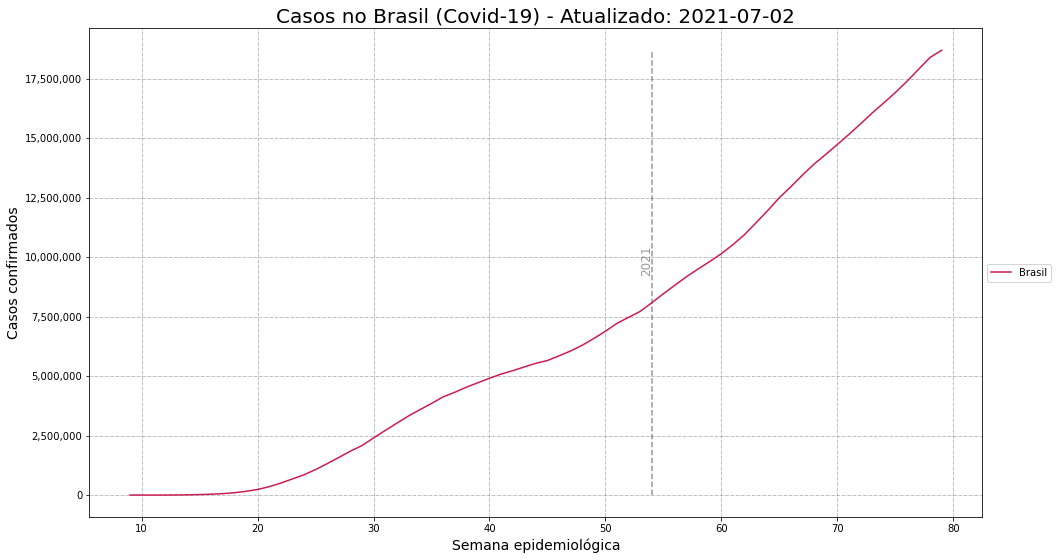

In [15]:
plot_semana(df_br, 'last_available_confirmed', 'Região','Casos no Brasil')

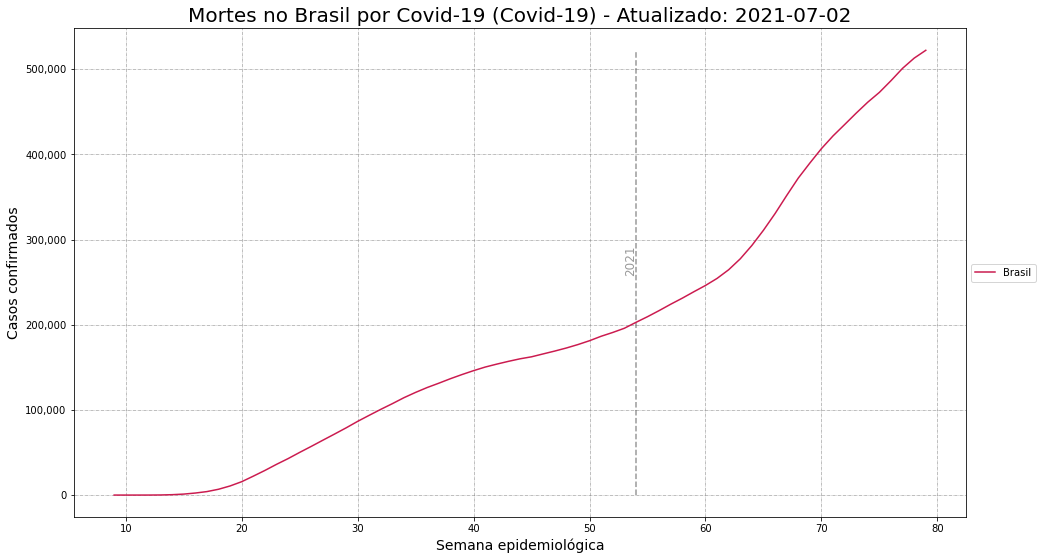

In [16]:
plot_semana(df_br, 'last_available_deaths', 'Região','Mortes no Brasil por Covid-19')

In [17]:
df_regiao_dia = df.query("place_type == 'state'").groupby(by=['Região','date']).agg({'epidemiological_week':'max','last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max','new_confirmed':'sum','new_deaths':'sum'})

df_regiao_dia.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
df_regiao_dia = df_regiao_dia.groupby(by=['Região', 'date']).agg({'epidemiological_week':'max','last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum','new_confirmed':'sum','new_deaths':'sum'})
df_regiao_dia.reset_index(drop=False, inplace=True)


# agrupando o dataset por região e semana epidemiológica
df_brd = df_regiao_dia.groupby(by=['date']).agg({'epidemiological_week':'max','last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'estimated_population' : 'sum','new_confirmed':'sum','new_deaths':'sum'})
df_brd.reset_index(drop=False, inplace=True)
df_brd['Região'] = 'Brasil'
df_brd = organiza_week(df_brd)

df_brd['media_movel'] = df_brd['new_deaths'].rolling(7).mean()
#df_brd.iloc[[*range(3),*range(-3,0)]]

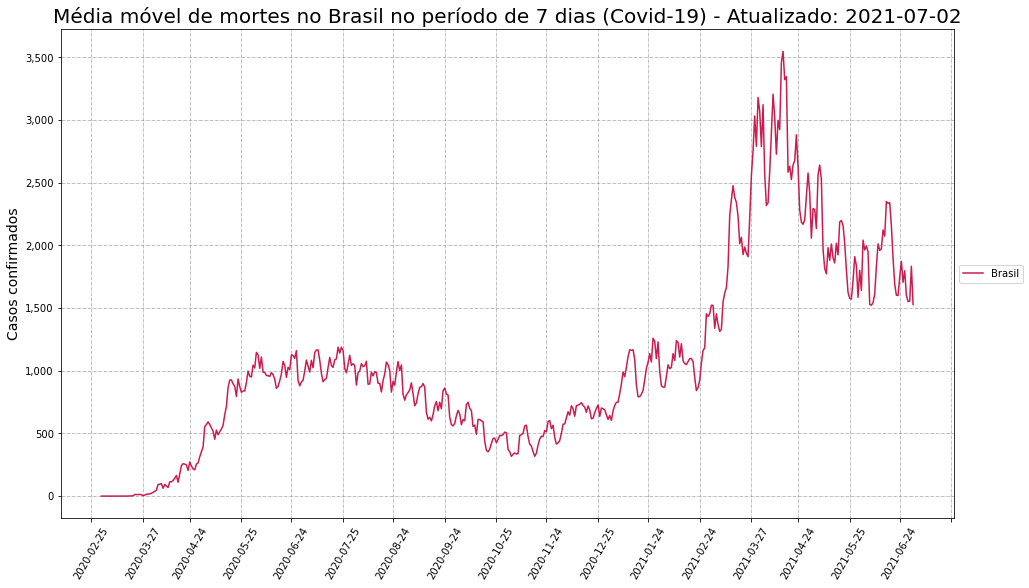

In [18]:
plot_dia(df_brd, 'media_movel', 'Região','Média móvel de mortes no Brasil no período de 7 dias')

Apesar da média móvel de mortes ter começado a diminuir ainda apresenta números bastante preocupantes se mantendo uma média de 1500 mortes diárias causadas pela doença

In [19]:
df_brd[df_brd['media_movel'] == df_brd['media_movel'].max()]

,date,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,Região,media_movel
415,2021-04-15,68,5436047,152130,88541092.0,71185,3491,Brasil,3549.0


O pior momento da média móvel de mortes foi no dia 15 de Abril do ano de 2021 com a média de 3549 mortes diárias. 

# Contexto Geral por Região

In [20]:
df_regiao.head()

,Região,epidemiological_week,last_available_confirmed,last_available_deaths,estimated_population
0,Centro Oeste,202011,15,0,30192315.0
1,Centro Oeste,202012,169,0,30192315.0
2,Centro Oeste,202013,521,5,30192315.0
3,Centro Oeste,202014,1175,24,30192315.0
4,Centro Oeste,202015,2073,64,30192315.0


In [21]:
df_regiao = organiza_week(df_regiao)

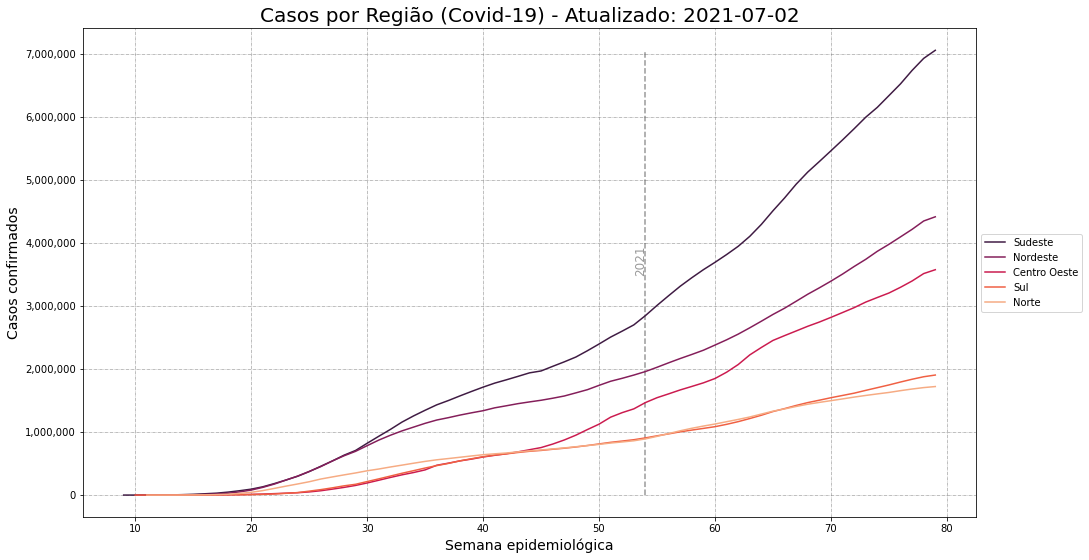

In [22]:
plot_semana(df_regiao, 'last_available_confirmed', 'Região','Casos por Região')

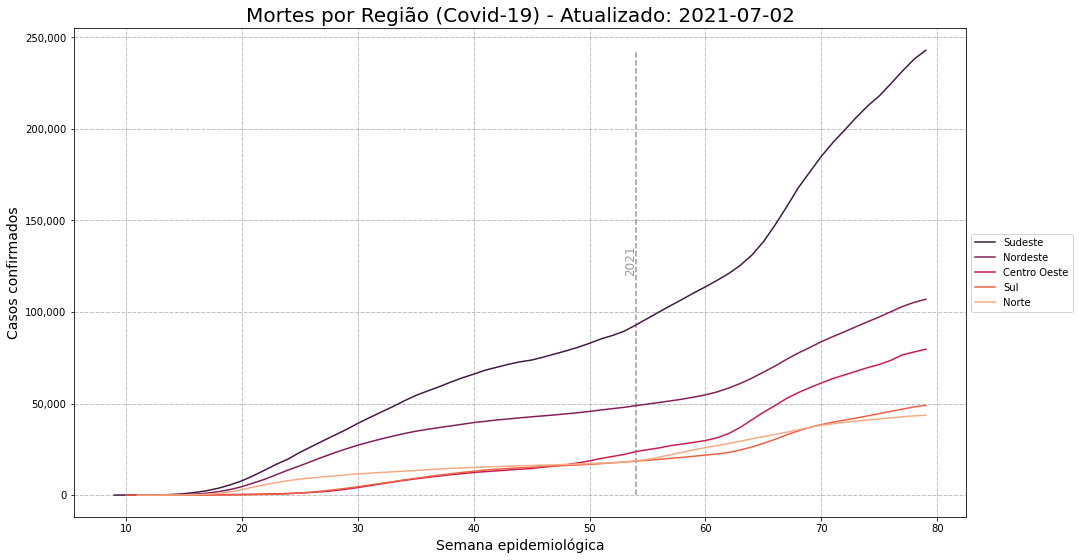

In [23]:
plot_semana(df_regiao, 'last_available_deaths', 'Região','Mortes por Região')

Mesmo não sendo possível identificar uma desaceleração no número de casos é possível notar que quando se trata do número de mortes a curva demonstrou uma desaceleração quando comparamos a semana 70 com a semana 60 da epidemia. Isso demonstra um bom sinal, pois é um forte indício de que a vacinação está começando a fazer efeito e a doença apresentando indícios da desaceleração no número de mortes, fato que ganha ainda mais força quando levamos em consideração a média móvel de casos que vem diminuindo.

# Análise para o estado do Espírito Santo

In [24]:
# Criando o dataset organizado por semana epidemiológica

df_es = df.query("place_type == 'state' & state == 'ES' ").groupby(by=['Região','state', 'epidemiological_week']).agg({'order_for_place' : 'max', 'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'estimated_population' : 'max','new_confirmed' : 'sum', 'new_deaths' : 'max','date':'max'})

df_es.reset_index(drop = False, inplace = True)
df_es = organiza_week(df_es)

df_es.head()

,Região,state,epidemiological_week,order_for_place,last_available_confirmed,last_available_deaths,estimated_population,new_confirmed,new_deaths,date
0,Sudeste,ES,10,3,1,0,4064052.0,1,0,2020-03-07
1,Sudeste,ES,11,10,4,0,4064052.0,3,0,2020-03-14
2,Sudeste,ES,12,17,26,0,4064052.0,22,0,2020-03-21
3,Sudeste,ES,13,24,61,0,4064052.0,35,0,2020-03-28
4,Sudeste,ES,14,31,166,6,4064052.0,105,3,2020-04-04


In [25]:
# Criando o dataset organizado por data

df_esd = df.query("place_type == 'state' and state == 'ES' ").groupby(by=['date','state',]).agg({'last_available_confirmed' : 'max', 'last_available_deaths' : 'max', 'new_confirmed':'max','new_deaths':'max'})

df_esd = df_esd.groupby(by=['date','state',]).agg({'last_available_confirmed' : 'sum', 'last_available_deaths' : 'sum', 'new_confirmed':'max','new_deaths':'sum'})


df_esd.reset_index(drop=False, inplace=True)

df_esd['date'] = pd.to_datetime(df_esd['date'], yearfirst=True)


df_esd = df_esd.sort_values('date')

df_esd.set_index('date', inplace = True)
df_esd.sort_index(ascending = True, inplace = True)

df_esd['media_movel_casos'] = df_esd['new_confirmed'].rolling(7).mean()
df_esd['media_movel_mortes'] = df_esd['new_deaths'].rolling(7).mean()

df_esd['mortes_5d'] = df_esd['new_deaths'].shift(-5, fill_value = 0)
df_esd['mortes_7d'] = df_esd['new_deaths'].shift(-7, fill_value = 0)
df_esd['mortes_10d'] = df_esd['new_deaths'].shift(-10, fill_value = 0)
df_esd['mortes_14d'] = df_esd['new_deaths'].shift(-14, fill_value = 0)

df_esd.iloc[[*range(-17,0)]]

,state,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths,media_movel_casos,media_movel_mortes,mortes_5d,mortes_7d,mortes_10d,mortes_14d
date,,,,,,,,,,,
2021-06-16,ES,502887,11218,1609,25,1245.714286,21.142857,29,23,18,15
2021-06-17,ES,504242,11236,1355,18,1274.571429,21.285714,18,19,11,23
2021-06-18,ES,505764,11264,1522,28,1258.000000,20.571429,23,19,25,18
2021-06-19,ES,506543,11269,779,5,1242.285714,19.571429,19,18,22,0
2021-06-20,ES,507204,11280,661,11,1239.142857,19.571429,19,11,15,0
2021-06-21,ES,508372,11309,1168,29,1219.000000,19.428571,18,25,23,0
2021-06-22,ES,509538,11327,1166,18,1180.000000,19.142857,11,22,18,0
2021-06-23,ES,511145,11350,1607,23,1179.714286,18.857143,25,15,0,0
2021-06-24,ES,512485,11369,1340,19,1177.571429,19.000000,22,23,0,0


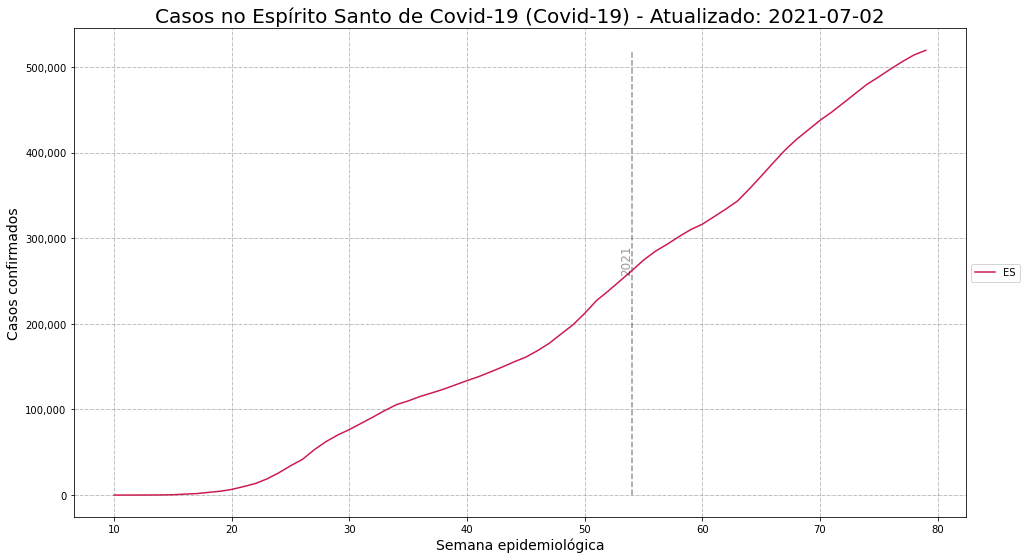

In [26]:
plot_semana(df_es, 'last_available_confirmed', 'state','Casos no Espírito Santo de Covid-19')

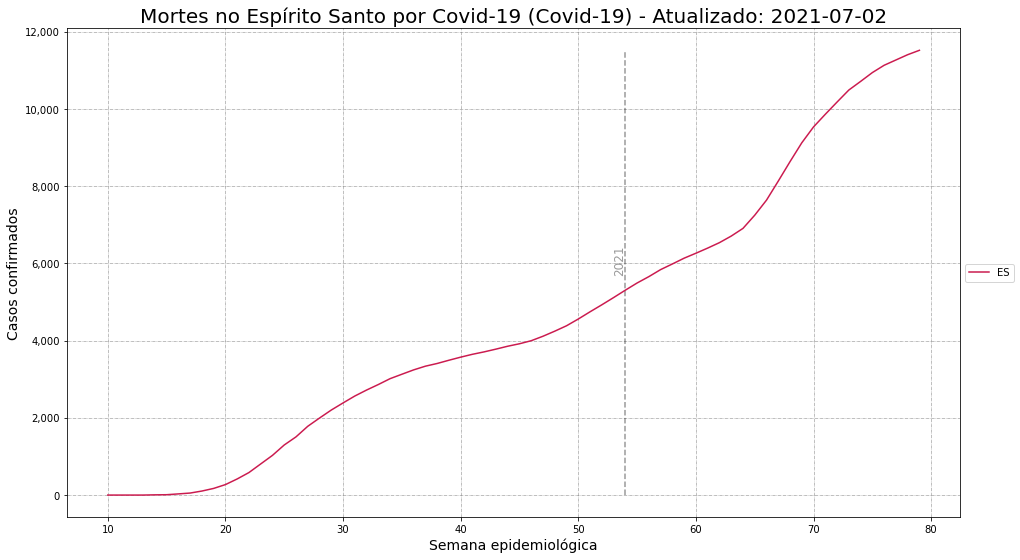

In [27]:
plot_semana(df_es, 'last_available_deaths', 'state','Mortes no Espírito Santo por Covid-19')

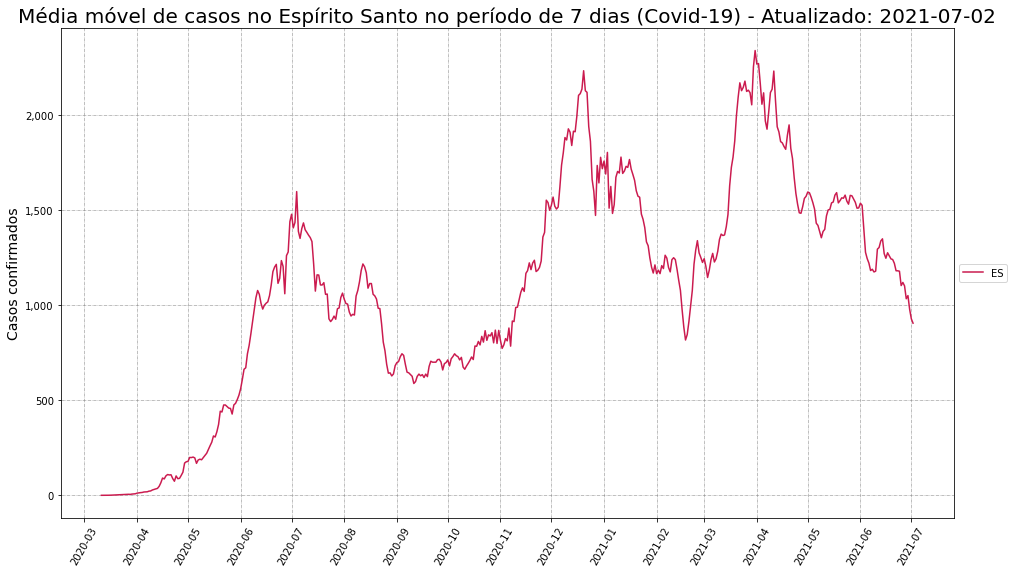

In [28]:
plot_dia(df_esd, 'media_movel_casos', 'state','Média móvel de casos no Espírito Santo no período de 7 dias')

Podemos observar que a média movel de mortes tem um certo delay em relação a média móvel de casos, pois os picos no gráfico de mortes sempre se dá depois do pico de casos.

# Analisando com o Facebook Prophet

Para entender melhor a correlação iremos utilizar o Facebook Prophet.


In [29]:
# Import's

import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

from pandas.plotting import autocorrelation_plot

#import Prophet
from fbprophet import Prophet


# alterando o tamanho das figuras
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,9)

In [30]:
data = df_esd

In [31]:
data.keys()

Index(['state', 'last_available_confirmed', 'last_available_deaths',
       'new_confirmed', 'new_deaths', 'media_movel_casos',
       'media_movel_mortes', 'mortes_5d', 'mortes_7d', 'mortes_10d',
       'mortes_14d'],
      dtype='object')

In [32]:
data.head()

,state,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths,media_movel_casos,media_movel_mortes,mortes_5d,mortes_7d,mortes_10d,mortes_14d
date,,,,,,,,,,,
2020-03-05,ES,1,0,1,0,NaN,NaN,0,0,0,0
2020-03-06,ES,1,0,0,0,NaN,NaN,0,0,0,0
2020-03-07,ES,1,0,0,0,NaN,NaN,0,0,0,0
2020-03-08,ES,1,0,0,0,NaN,NaN,0,0,0,0
2020-03-09,ES,1,0,0,0,NaN,NaN,0,0,0,0


In [33]:
data['taxa_casos'] = data['new_confirmed'].diff()

<BarContainer object of 485 artists>

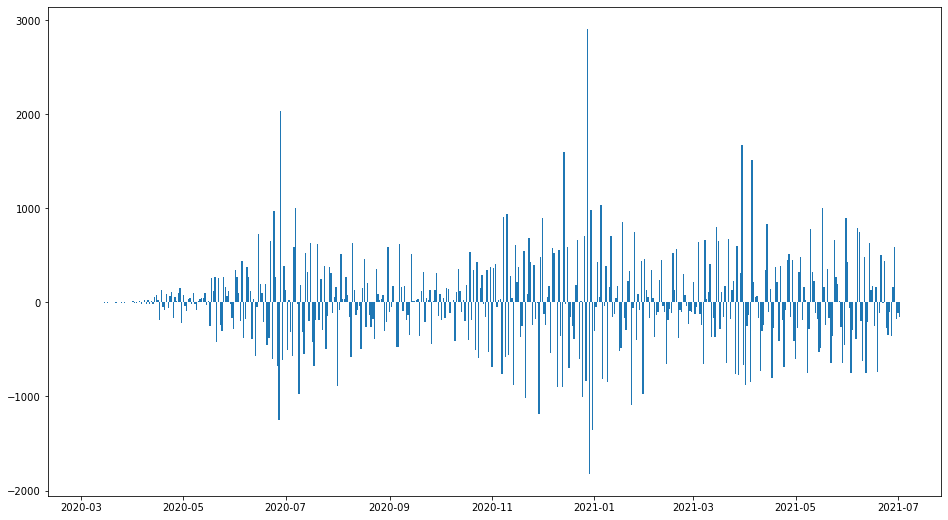

In [34]:
plt.bar(data.index, data['taxa_casos'])

In [35]:
maio = data.loc[(data.index.month==5) & (data.index.year == 2021)]
junho = data.loc[(data.index.month==6) & (data.index.year == 2021)]

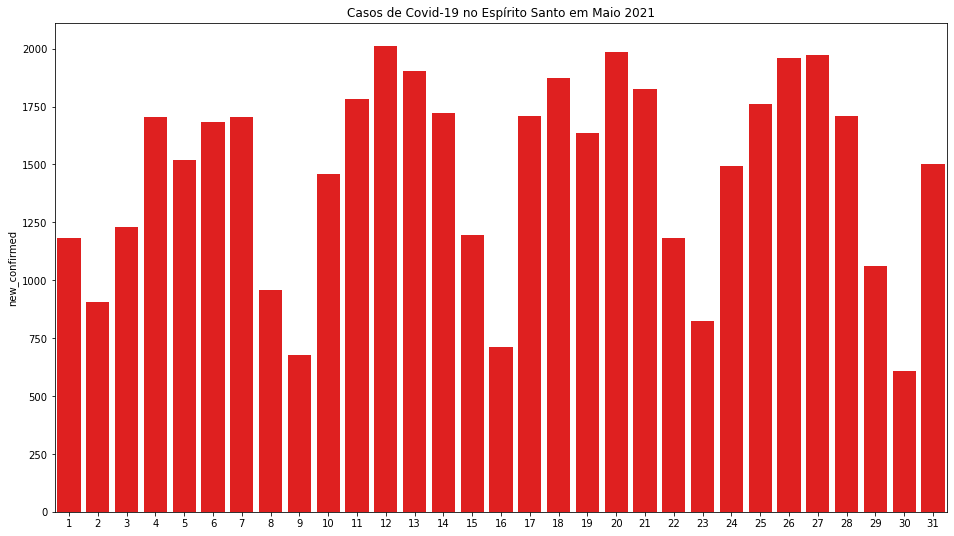

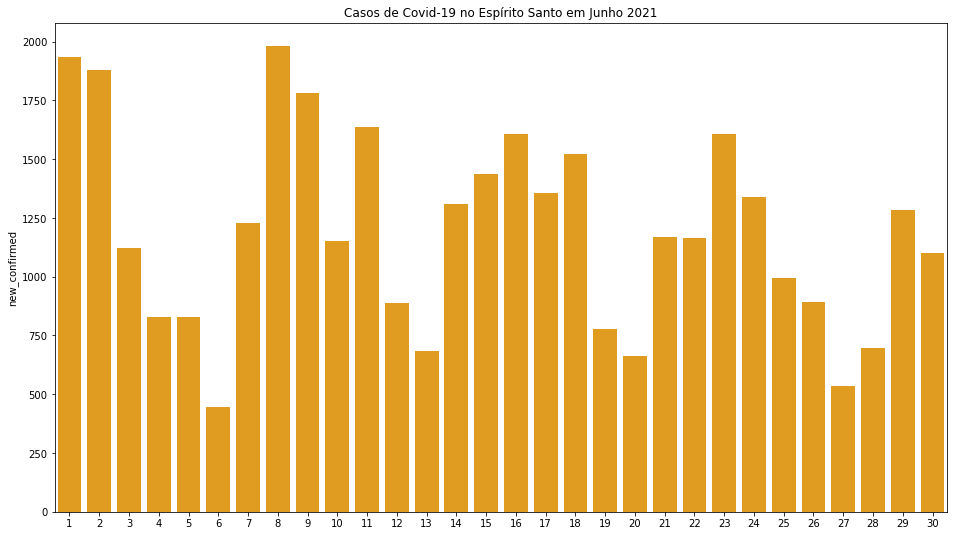

In [41]:
sns.barplot(x = np.linspace(1,31,31,dtype= int),y= 'new_confirmed', data = maio, color= 'red')
plt.title('Casos de Covid-19 no Espírito Santo em Maio 2021')
plt.show()
sns.barplot(x = np.linspace(1,30,30,dtype= int),y= 'new_confirmed', data = junho, color= 'orange')
plt.title('Casos de Covid-19 no Espírito Santo em Junho 2021')
plt.show()

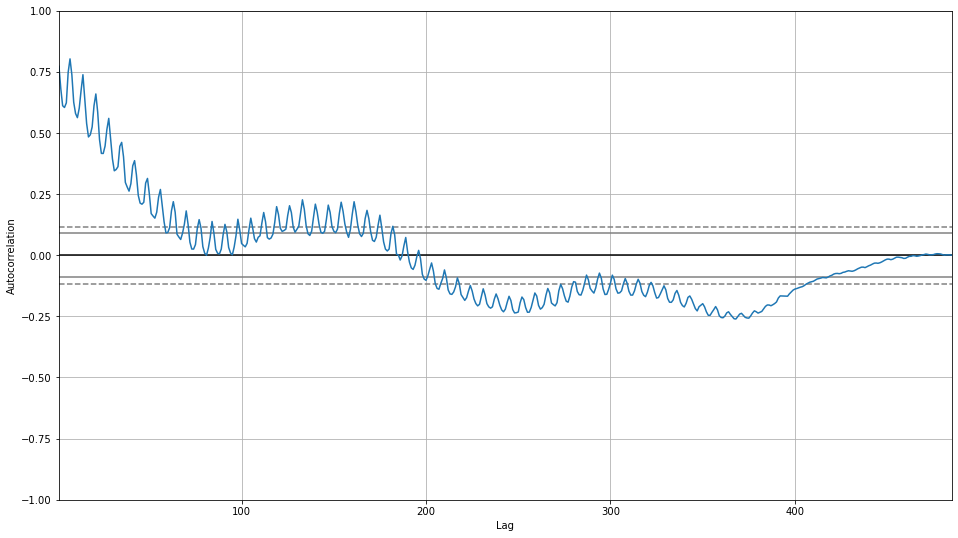

In [37]:
autocorrelation_plot(data['new_confirmed']);

## Criando o modelo

In [38]:
modelo = Prophet()

In [39]:
prophet = pd.DataFrame()
prophet['y'] = data['new_confirmed']

prophet.reset_index(drop = False , inplace=True)

prophet.columns = ['ds','y']
prophet.tail()

,ds,y
480,2021-06-28,695
481,2021-06-29,1282
482,2021-06-30,1101
483,2021-07-01,990
484,2021-07-02,836


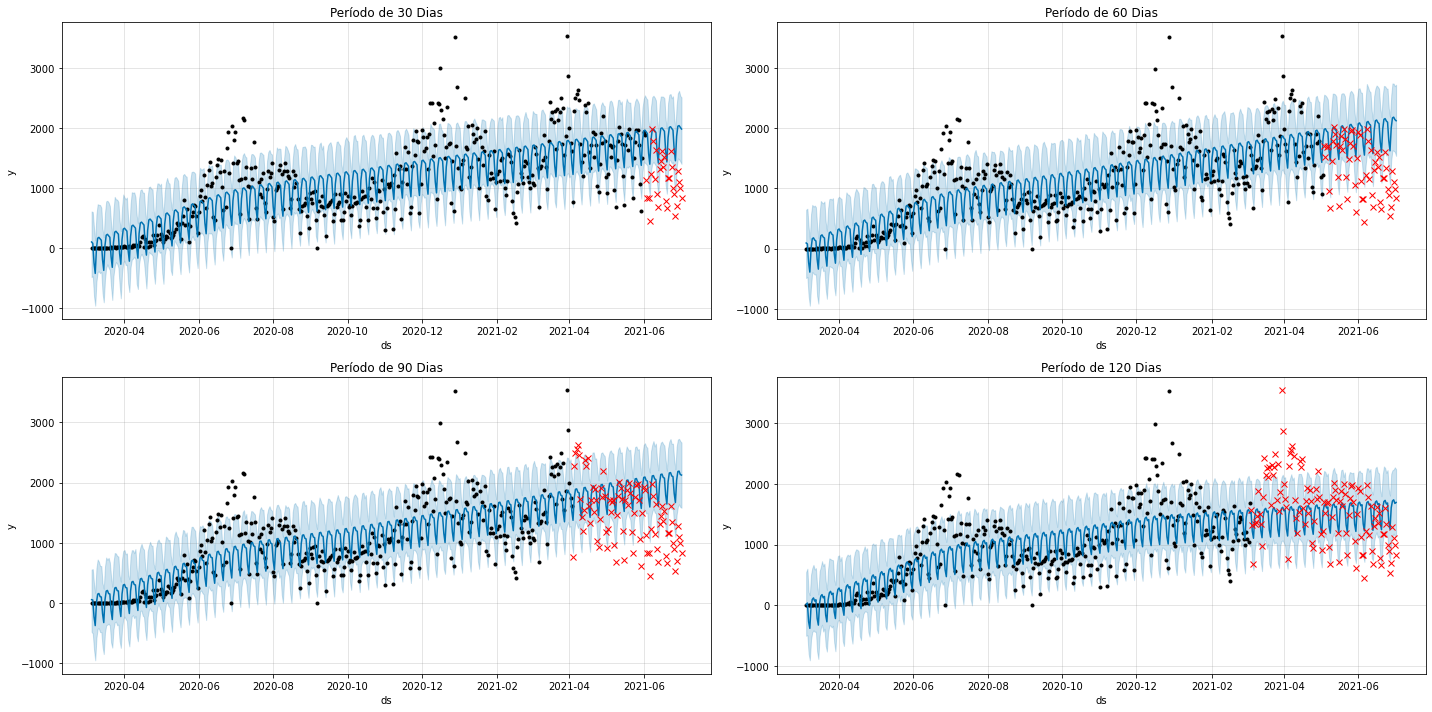

In [44]:
linha = 0
coluna = 0

fig, ax = plt.subplots(2,2, figsize=(20,10))

for dias in range(30,5*30,30):

    # Separando em dados de treino e dados de teste   
    profeta = pd.DataFrame()
    profeta['ds'] = prophet['ds'][:(prophet.shape[0]-dias)]
    profeta['y'] = prophet['y'][:(prophet.shape[0]-dias)]

    # Criando o modelo
    modelo = Prophet(daily_seasonality = False, yearly_seasonality = False)
    modelo.fit(profeta)

    # Fazendo as previsões
    previsto = modelo.make_future_dataframe(periods=dias)
    previsto = modelo.predict(previsto)

    # Dataframe de teste para a validação do que foi previsto
    df_teste = pd.DataFrame()
    df_teste['ds'] = prophet['ds'][(prophet.shape[0]-dias):]
    df_teste['y'] = prophet['y'][(prophet.shape[0]-dias):]

    # Plot's
    modelo.plot(previsto,xlabel = 'ds', ylabel = 'y', ax = ax[linha, coluna])
    ax[linha,coluna].plot(df_teste['ds'],df_teste['y'],'.r', marker = 'x');
    ax[linha,coluna].set_title('Período de '+str(dias)+ ' Dias')

    # Atualizando a formatação das linhas e colunas
    if coluna == 1:
        coluna=0
        linha+=1
    else:
        coluna+=1

# Conclusões

Desde de o início do mes de Maio de 2021 a vacinação ganhou força e trouxe uma redução no número de mortes diaria e também redução na média móvel de mortes que pela primeira vez desde Março deste mesmo ano apresentou a média menor que 2 mil mortes.

Podemos observar com base na previsão de casos para o estado do Espírito Santo apresentou uma tendência de desaceleração da doença em todos os cernário simulados, o que nos traz uma esperança que até o final do ano podemos ter números menores de casos e principalmente de mortes relacionadas a COVID-19.

# Referências

[[1]](https://www.es.gov.br/Noticia/governo-do-espirito-santo-divulga-62o-mapa-de-risco-covid-19) 62º Mapa de Risco Covid-19

[[2]](https://www.scielosp.org/article/csc/2020.v25n9/3401-3411) COVID-19 e os impactos na saúde mental: uma amostra do Rio Grande do Sul, Brasil

[[3]](https://g1.globo.com/bemestar/coronavirus/noticia/2021/07/02/queda-das-mortes-por-covid-aponta-indicio-do-efeito-da-vacinacao-no-brasil-veja-o-que-se-sabe-e-os-alertas.ghtml) Queda das mortes por Covid aponta indício do efeito da vacinação no Brasil; veja o que se sabe e os alertas

